# SBML Models

The Systems Biology Markup Language (SBML) is a computer-readable format designed for representing models of biological systems. It is an XML-based standard that encodes computational models in systems biology, a field focused on understanding the interactions and behaviors of biological components within a system.

## Key Features and Benefits

- **Standardization**: SBML provides a standardized format for encoding biological models, ensuring consistency and interoperability across different software tools.
- **Model Exchange**: Facilitates the exchange of models between different research groups and software applications, allowing researchers to utilize the best tools available for various aspects of their work.
- **Collaboration and Reproducibility**: Enhances collaboration by enabling researchers to share models easily. It also ensures that models can be stored, archived, and reused, promoting reproducibility in scientific research.

## Components of SBML

SBML models describe biochemical entities (such as species), the reactions between these entities, and the mathematical rules that govern the system. It can represent a wide range of biological processes, including metabolism, cell signaling, and gene regulation.

## Development and Support

The development of SBML is coordinated by the SBML Project, a community-driven effort that includes researchers, software developers, and other stakeholders in systems biology. The project provides libraries, software tools, and educational resources for working with SBML.

## Working with SBML

To work with SBML models, additional packages such as `sbmlutils` and `libroadrunner` are required. These packages facilitate the manipulation and simulation of SBML models. You can install them via pip:

pip install sbmlutils
pip install libroadrunner

By using these tools, researchers can effectively create, modify, and analyze SBML models, enhancing their understanding of complex biological systems and improving the quality of their computational studies.

## Encode SBML model
In a first step we encode our simple model with sbmlutils as SBML.

![Absorption Elimination Model](04_simple_absorption.png)

In [4]:
from sbmlutils.factory import *
from sbmlutils.metadata import *
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

m = Model(
    sid="absorption_first_order",
    name="Absorption model with first order kinetics",
    
)
m.compartments = [
    Compartment("body", 1.0, name="Body", sboTerm=SBO.SIMPLE_CHEMICAL)
]
m.parameters = [
    Parameter("Dose_A", 10.0, name="Dose of A"),
    Parameter("ka", 1.0, name="Absorption rate"),
    Parameter("ke", 1.0, name="Elimination rate"),
]
m.species = [
    Species("A_tablet", initialAmount=0.0, hasOnlySubstanceUnits=True, 
            compartment="body", name="A (tablet)", sboTerm=SBO.SIMPLE_CHEMICAL),
    Species("A_central", initialAmount=0.0, hasOnlySubstanceUnits=True,
           compartment="body", name="A (body)", sboTerm=SBO.SIMPLE_CHEMICAL),
    Species("A_urine", initialAmount=0.0, hasOnlySubstanceUnits=True,
           compartment="body", name="A (urine)", sboTerm=SBO.SIMPLE_CHEMICAL),
]
m.assignments = [
    InitialAssignment("A_tablet", "Dose_A")
]
m.reactions = [
    Reaction(
        "ABSORPTION",
        name="absorption A",
        equation="A_tablet -> A_central",
        formula = "ka * A_tablet"
    ),
    Reaction(
        "ELIMINATION",
        name="elimination A",
        equation="A_central -> A_urine",
        formula = "ke * A_central"
    )
]

# save the model (uncomment the following lines to create the model)
# results = create_model(
#     model=m,
#     filepath=Path("absorption_first_order.xml"),
#     validation_options=ValidationOptions(units_consistency=False)
# )

**Exercise**: Explore the model with `https://sbml4humans.de`. Upload the model to the website and navigate the objects.

**Exercise**: Visualize the model with cytoscape and `cy3sbml`. I.e. download Cytoscape, install the app `cy3sbml` and load the model to explore the model.

## Simulate SBML model
In a second step we load the model and perform a simple simulation and visualization.

In [2]:
import roadrunner
import pandas as pd
r = roadrunner.RoadRunner("absorption_first_order.xml")
s = r.simulate(start=0, end=10, steps=100)
df = pd.DataFrame(s, columns=s.colnames)
print(df)

     time  [A_tablet]  [A_central]  [A_urine]
0     0.0   10.000000     0.000000   0.000000
1     0.1    9.048374     0.904837   0.046788
2     0.2    8.187307     1.637462   0.175231
3     0.3    7.408182     2.222455   0.369363
4     0.4    6.703201     2.681278   0.615521
..    ...         ...          ...        ...
96    9.6    0.000677     0.006502   9.992821
97    9.7    0.000613     0.005945   9.993443
98    9.8    0.000555     0.005434   9.994011
99    9.9    0.000502     0.004967   9.994531
100  10.0    0.000454     0.004540   9.995006

[101 rows x 4 columns]


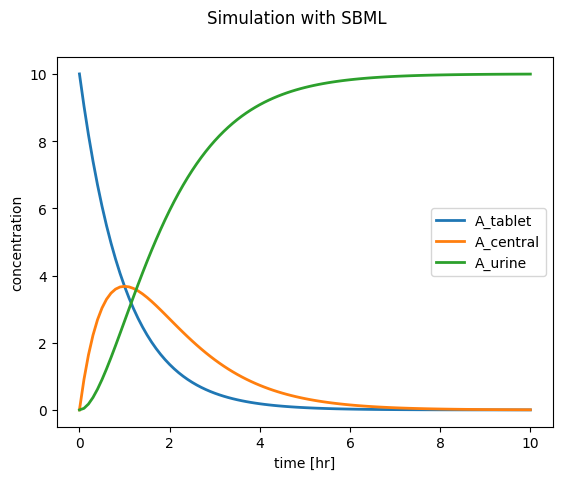

In [3]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(nrows=1, ncols=1)
f.suptitle("Simulation with SBML")

for name in ["A_tablet", "A_central", "A_urine"]:
    ax.plot(df.time, df[f"[{name}]"], lw=2, label=name)
    
ax.set_ylabel("concentration")
ax.set_xlabel("time [hr]")
ax.legend()
plt.show()